In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bicho15h","key":"97e3a4c4c190ec2c4cd7972b5c9a4ffa"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sansuthi/dry-bean-dataset

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 48.9MB/s]


In [6]:
!mkdir bean

In [7]:
!unzip dry-bean-dataset.zip -d bean

Archive:  dry-bean-dataset.zip
  inflating: bean/Dry_Bean.csv       


In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import metrics

In [10]:
df = pd.read_csv('/content/bean/Dry_Bean.csv')

In [11]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [12]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [15]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [57]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [58]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

df['Class'] = label_encoding.fit_transform(df['Class'].astype(str))

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [108]:
X = df.drop(columns=["Class"])
Y = df["Class"]

In [109]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [110]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [125]:
scaler = StandardScaler()
col_names = X.columns

X = scaler.fit_transform(X)

X = pd.DataFrame(data=X, columns=col_names)
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [126]:
n_clusters = range(2, 15)

inertia = []

for i in n_clusters:
  kmeans_model = KMeans(n_clusters=i,init = "k-means++", max_iter = 500, n_init = 10, random_state = 123).fit(X)
  inertia.append(kmeans_model.inertia_)

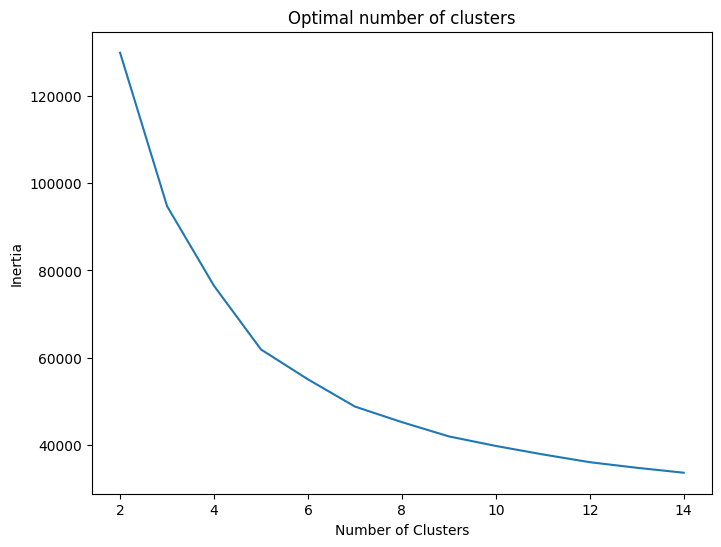

In [127]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.lineplot(x=n_clusters, y=inertia)
axs.set_xlabel("Number of Clusters")
axs.set_ylabel("Inertia")
axs.set_title("Optimal number of clusters")
plt.show()

Optimal number of cluster is 7

In [128]:
kmeans_model = KMeans(n_clusters=7,init = "k-means++", max_iter = 500, n_init = 10, random_state = 123).fit(X)

In [129]:
kmeans_model.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

In [130]:
kmeans_model.cluster_centers_

array([[-0.73345798, -0.92010578, -0.89724752, -0.83109697, -0.42698108,
        -0.19759058, -0.73412543, -0.89822949,  0.1298094 ,  0.25462573,
         0.63405245,  0.36339487,  1.0880087 ,  0.8112871 ,  0.33412751,
         0.45316749],
       [ 0.0214399 ,  0.30154739,  0.62480115, -0.42004574,  1.85284701,
         1.29465956,  0.02061022,  0.13105397, -0.95288126, -0.03891602,
        -1.32285122, -1.63830016,  0.40813489, -1.14110547, -1.56467604,
        -0.33904114],
       [ 0.71521153,  0.95779523,  0.86447154,  0.84070893,  0.25471807,
         0.40106872,  0.71772288,  0.90115025,  0.15079986, -0.44555601,
        -0.80553896, -0.33627772, -1.06557416, -0.82187268, -0.3576314 ,
        -0.30250651],
       [-0.29368506, -0.28558711, -0.25570473, -0.27153409, -0.0472722 ,
         0.19013288, -0.29536201, -0.263435  , -0.04257481,  0.18964268,
         0.17017244, -0.0478679 ,  0.16995348, -0.05521776, -0.0810694 ,
         0.15059138],
       [-0.46569066, -0.62256664, -0

In [131]:
print("Homogeneity_score: ", metrics.homogeneity_score(Y, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(Y, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(Y, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(Y, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(Y,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(X, kmeans_model.labels_))

Homogeneity_score:  0.7050088191797499
Completeness_score:  0.7230983470607083
v_measure_score:  0.7139390150308408
Adjusted_rand_score:  0.6688349540268246
Adjusted_mutual_info_score:  0.71372965124116
Silhouette_score:  0.3093837844563813
